## Neural Network
### Neuron
A neuron is a small component in the neural network, it computes a weighted sum of icputs plut a bias, and then applies it to an activation function

So it should receive icputs and it will eventually given an ouput

$$
z = w^{T}x + b = \sum_{i=1}^{n}w_{i}x_{i} + b
$$
here $w^{T}$ is the weight matrix and $x$ are the icputs (previous values)

we can do a small example:
$$
x = \begin{bmatrix} 1 \\ 2 \end{bmatrix} w = \begin{bmatrix} 0.5 \\ -1.0 \end{bmatrix}, b = 0.1\\
w_{1}x_{1} = 0.5 * 1 = 0.5\\
w_{2}x_{2} = -1.0 * 2 = -2.0\\
\sum{}{} = 0.5 + (-2.0) = -1.5\\
add bias: z = -1.5 + 0.1 = -1.4\\
ReLU a = max(0,z) = 0\\
$$

### Activation function
It's a function that calculates the output of the node based on its individual icputs and theri weights

Previously we used in logistic regression the sigmoid activation function

Recalling it: $$\sigma(x) = \frac{1}{1+e^{-x}}$$, but there are other activation functions

$ReLU = max(0,z)$ very effective and simple in these neural network

$$
Softmax = \frac{e^x_{i}}{\sum_{j=1}^{J}e^x_{j}}
$$ 
usually used in the categorial last layer outputs, forming percentage for each prediction

### Layers
The first layer is called icput layer, which nodes don't do operations, and usually size of icputs

The last layer is the output layer, usually size of the desidered output vector size

For example in the well-known number recognition, the icput layer is the size of the image (length*width), and the output layer is 10 to get the vector of probability for each number

The layer between these 2 are called hidden layer, since they could be any size, now for a hidden layer $l$ it will have a weighted matrix $W^{l} \in \mathbb{R}^{n}$ (m neurons, n icputs), a bias vector (1 hot) $b^{l} \in \mathbb{R}^{n}$ and icput vector activations from previous layer $a^{l-1} \in \mathbb{R}^{n}$

So generally for a layer $l$:

Pre-activation:
$z^{l} = W^{l}a^{l-1}+b^{l}$

Post-activation: $a^{l} = \phi(z^{l})$

Shape reminder: if $W^{l}$ is $m * n$ then $a^{l-1}$ must be $n * 1$, producing $z^{l}$ of shape $m * 1$

### Loss functions
Measures how bad a single prediction $\^{y}$ is compared to the true label y
#### Mean squared error (regression)
Penalizes larger deviations more heavily, differentiable, maximum likelihhod under Gaussian noise
$$
L(\^{y},y) = \frac{1}{2} \sum_{i}{}(\^{y_{i}} - y)^2
$$
#### Binary classification loss
Negative log-likelihood of a Bernoulli distribution, encourage the model to assign high probability to the correct class, penalizes wrong prediction strongly
$$
L(\^{y},y) = -(ylog(\^{y}) + (1-y)log(1-\^{y}))
$$
#### Categorical Cross-Entropy (Multi-class classificatio) 
The target is k classes, represented by 1-hot vector
$$
L(\^{y},y) = -\sum_{j-1}^{K}y_{j}log(\^{y}_{j})
$$

### Back propagation
The above points applies to the step called Forward propagation, since it calculates the values from previous to next neurons

Now the core step is to update the model's parameters to align with the ground truth.

Thus we should know if we need to increase or decrease a certain neuron's parameter, and how many we should increase/decrease

And we should change the parameter for each neuron of each layer $l$, by knowing what are the requirements on the layer $l+1$, so this is the meaning of propagating backwards 

So from forward propogation, we have these formulas:
(Supposing the loss is MSE)
$$
L(\^{y},y) = \frac{1}{2} \sum_{i}{}(\^{y_{i}} - y)^2\\
z = w^{T}x + b = \sum_{i=1}^{n}w_{i}x_{i} + b\\
a^{l} = \phi(z^{l})
$$

We can cleary notice here that $\^{y_{i}}$ influences $L(\^{y},y)$

$w^{T}, x, b$ influences $z$

$z$ influences $a$

What we want to calculate is how much we should increase/decrease the previous layer's neuron

Basically we're trying to calculate:
$$\frac{dCost}{dw^{l}}$$

The derivative tells us the sensitivity of Cost in terms of w, so changing a bit w how much will the cost change?

So conceptually since we have the influence change then:
$$
\frac{dCost}{dw^{l}} = \frac{dz^{l}}{dw^{l}}*\frac{da^{l}}{dz^{l}}*\frac{dCost}{da^{l}}
$$

And this is the chain rule in networks

Now we can basically calculate all the derivatives, since we have the formula and the all of them are derivable

$$
\frac{dz^{l}}{dw^{l}} = a^{l-1}\\
\\
\frac{da^{l}}{dz^{l}} = \phi^{I}(z^{l})\\
\\
\frac{dCost}{da^{l}} = (a^{l} - y)
$$
now we can substitute back to original formula:
$$
\frac{dCost}{dw^{l}} = a^{l-1}\phi^{'}(z^{l})(a^{l} - y)
$$

Since the full cost is averaged between all the examples, also this ratio should be averaged to all training examples

To compute the same thing with bias just substitute
$$
\frac{dz^{l}}{dw^{l}} to \frac{dz^{l}}{db^{l}}\\
\frac{dCost}{db^{l}} = 1\phi^{I}(z^{l})(a^{l} - y)
$$

#### Multiple layer
So this was a simplified example, but when we have multiple neurons at each layer?
The cost would become:
$\sum_{i}{}(\^{y_{i}} - y)^2$ and the $z$ would be: $\sum_{i=1}^{n}w_{i}x_{i} + b$
The derivatives are not influenced

But in reality we don't use $\frac{dCost}{dw^{l}}$ but rather the error signal per layer
$$\delta^{l} = \frac{dL}{dz^{l}} = \frac{da^{l}}{dz^{l}}⊙\frac{dCost}{da^{l}}$$

So this error signal will be passed during the back propagation, rather recomputing all the previous calculation for each neuron in each layer:

$$
\frac{dCost}{dW^{l}} = \delta^{l}(a^(l-1))^{T}
$$

here the $W$ indicates the matrix of layer $l$, and for bias:

$$
\frac{dCost}{db^{l}} = \delta^{l}
$$

We differentiate 2 cases: one for output layer, and the other for the hidden layer

Output:
$$
\delta^{L} = \frac{dL}{dz^{l}} = \frac{dCost}{da^{l}}⊙phi^{'}(z^{l}) = (a^{L} - y)⊙\phi^{'}(z^{L})
$$

Hidden:
$$
\delta^{l} = (W^{l+1})^{T}\delta^{l+1}⊙\phi^{'}(z^{l})
$$

Note: $(W^{l+1})^{T}\delta^{l+1}$ is matrix multiplication and $⊙$ is elementwise multiplication

As we can see the $\delta^{l+1}$ got passed to previous level, so we don't actually need to recompute every derivative each time for each neuron

$(W^{l+1})^{T}\delta^{l+1}$ tells how each neuron in layer $l$ matters to the error in the next layer

$\phi^{'}(z^{l})$ adjusts this by how sensitive the activation is to its icput

### Update Rules
Now that we know "how sensitive" are each neuron for adjusting the final result we need to indeed modify and replace them

#### Stochastic Gradient Descent (SGD)
Compute each image in mini-batches, and update in mini-batches
$$ W = W - \alpha\frac{dL}{dW}$$

#### SGD with momentum
Don't instantly change direction, but rather buil the momentum
$$
v_{t} = \mu v_{t-1} - \alpha\frac{d}{d\Theta_{j}}{L_{t}}\\
W_{t} = W_{t-1} + v_{t}
$$
we need to choose the $\mu = 0.9$ or you can increment it for noisy problems

$v$ is the velocity, accumulates a moving average of past fradients

$\mu$ a momentum coefficient

$\frac{d}{d\Theta_{j}}{L_{t}}$ normal gradient step
#### RMSProp (Adaptive learning rate)
$$
s_{t} = \Beta s_{t-1} + (1 + \Beta)(\frac{d}{d\Theta_{j}}{L_{t}})^2\\
W_{t} = W_{t-1} - \frac{\alpha}{\sqrt{s_{t} + \epsilon}}\frac{d}{d\Theta_{j}}{L_{t}}
$$

$s$: average of squared gradients

$\epsilon = 10^{-8}$: avoid division by 0

$\Beta = 0.9$: Momentum

#### Adam
A combination of Momentum and RMSProp

- Momentum smooths gradients over time

- RMSProp rescales learning rate per parameter (large gradient -> smaller)

Compute biased first moment (mean of gradients)
$$
m_{t} = \Beta_{1}m_{t-1} + (1-\Beta_{1})Gradient(L_{t})
$$
Compute biased second moment
$$
v_{t} = \Beta_{2}m_{t-1} + (1-\Beta_{2})Gradient(L_{t})^2
$$
Bias correction, because at beginning $m_{t},v_{t}$ are too small
$$
\^{m_{t}} = \frac{m_{t}}{1-\Beta_{1}^{t}}, \^{v_{t}} = \frac{v_{t}}{1-\Beta_{2}^{t}}
$$
Update the weights and bias
$$
W_{t} = W_{t-1} - \alpha\frac{\^{m_{t}}}{\sqrt{\^{v_{t}}} + \epsilon}
$$
$\Beta_{2} = 0.999$

### Example

Let's do a classi example, the hand written digit recognition

Note: after learning CNN we can handle spacial patterns with conv and pooling...

In [ ]:
import cupy as cp # Move from numpy to cupt for GPU training
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Prepare the data
data = pd.read_csv('./data/train.csv')
data = cp.array(data)
m, n = data.shape
print(m)
print(n)

cp.random.shuffle(data)
data_train = data.T # Transpose
X_train = data_train[1:n]
y_train = data_train[0]
X_train = X_train / 255. # Normalization from 255 color to numbers between 0 and 1
print(X_train)

42000
785
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
def init():
    W1 = cp.random.rand(100, 784) - 0.5  # input → hidden1
    b1 = cp.random.rand(100, 1) - 0.5 # Subtract 0.5 to let the numbers be between [-0.5,0.5]

    W2 = cp.random.rand(10, 100) - 0.5   # hidden1 → hidden2
    b2 = cp.random.rand(10, 1) - 0.5

    W3 = cp.random.rand(10, 10) - 0.5   # hidden2 → output
    b3 = cp.random.rand(10, 1) - 0.5
    return W1,b1,W2,b2,W3,b3

def ReLU(Z):
    return cp.maximum(0,Z) # Note: Z is a vector

def softmax(Z):
    exp = cp.exp(Z - cp.max(Z)) 
    return exp / exp.sum(axis=0)

def forward(W1,b1,W2,b2,W3,b3,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1,A1,Z2,A2,Z3,A3

def one_hot(Y):
    # get the maximum value
    num_classes = Y.max().item() + 1
    one_hot_Y = cp.zeros((Y.size, num_classes))
    one_hot_Y[cp.arange(Y.size), Y] = 1
    # Transpose to get (num_class,m) shape
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backprop(Z1,A1,Z2,A2,A3,W2,W3,X,Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y # Assuming loss is L = - Σ Y * log(A3), ∂L / ∂Z3, error in pre-activation
    dW3 = (1/m) * dZ3.dot(A2.T) # ∂L / ∂W3, averaged on the batch size (L is not total loss, its average over the batch)
    # Moreover, we are trying to calculate ∂J / ∂W3 = 1/m \sum(∂L / ∂W3)
    db3 = (1/m) * cp.sum(dZ3,axis = 1, keepdims=True) #∂L / ∂b3, sum by col of dZ3, and average

    dA2 = W3.T.dot(dZ3) # ∂L / ∂A2 = ∂L / ∂Z3 * ∂Z3 / ∂A2 = dZ3 * d(W3*A2+b3)
    dZ2 = dA2 * (Z2 > 0) # Derivative of ReLU
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * cp.sum(dZ2,axis = 1, keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * cp.sum(dZ1,axis = 1, keepdims=True)

    return dW1,db1,dW2,db2,dW3,db3

def update(W1,b1,W2,b2,W3,b3,dW1,db1,dW2,db2,dW3,db3,alpha):
    # Update using SGD
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1   
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1,b1,W2,b2,W3,b3

In [ ]:
def get_pred(A3):
    return cp.argmax(A3, axis=0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return cp.sum(predictions == Y) / Y.size
def gradient(iter,alpha,X,Y):
    W1,b1,W2,b2,W3,b3 = init()
    for i in range(iter):
        Z1,A1,Z2,A2,Z3,A3 = forward(W1,b1,W2,b2,W3,b3,X)
        dw1,db1,dw2,db2,dw3,db3 = backprop(Z1,A1,Z2,A2,A3,W2,W3,X,Y)
        W1,b1,W2,b2,W3,b3 = update(W1,b1,W2,b2,W3,b3,dw1,db1,dw2,db2,dw3,db3,alpha)
        if i % 100 == 0:
            # Show message each 10 iterations
            print("Iteration: ", i)
            prediction = get_pred(A3)
            print(get_accuracy(prediction,Y))
    return W1,b1,W2,b2,W3,b3

W1,b1,W2,b2,W3,b3 = gradient(3000,0.05,X_train,y_train)

Iteration:  0
[3 3 3 ... 9 5 5] [6 4 6 ... 7 8 8]
0.12473809523809523
Iteration:  100
[6 5 6 ... 5 5 5] [6 4 6 ... 7 8 8]
0.2844047619047619
Iteration:  200
[6 4 7 ... 6 5 5] [6 4 6 ... 7 8 8]
0.5209047619047619
Iteration:  300
[7 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.6273333333333333
Iteration:  400
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.6950714285714286
Iteration:  500
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.7459523809523809
Iteration:  600
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.7801428571428571
Iteration:  700
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8059761904761905
Iteration:  800
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8257619047619048
Iteration:  900
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8393809523809523
Iteration:  1000
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8508809523809524
Iteration:  1100
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8588095238095238
Iteration:  1200
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.866
Iteration:  1300
[6 4 6 ... 7 8 8] [6 4 6 ... 7 8 8]
0.8720238095238095
Iteration:  1400

In [25]:
def make_prediction(X,W1,b1,W2,b2,W3,b3):
    _, _, _, _, _, A3 = forward(W1,b1,W2,b2,W3,b3,X)
    preds = get_pred(A3)
    return preds
import numpy as np
def test_pred(idx,W1,b1,W2,b2,W3,b3):
    current_img = X_train[:,idx,None]
    pred = make_prediction(current_img,W1,b1,W2,b2,W3,b3)
    label = y_train[idx]
    print("Prediction: ", pred)
    print("Truth: ", label)
    current_image1 = current_img.reshape((28,28)) * 255
    # Transfer the final image from GPU to CPU as NumPy array
    current_image = current_image1.get()
    plt.imshow(current_image, cmap='gray', interpolation='nearest')
    plt.show()

Prediction:  [6]
Truth:  6


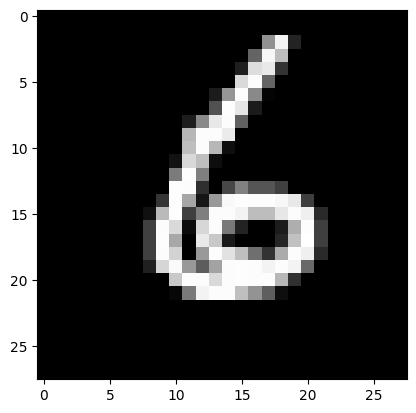

Prediction:  [1]
Truth:  9


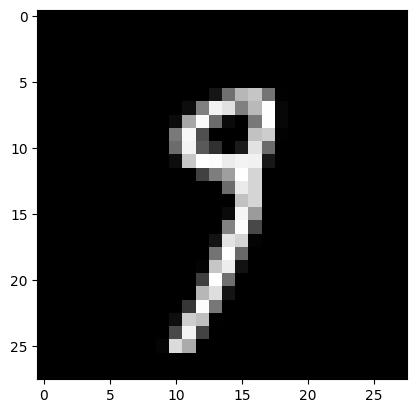

In [ ]:
test_pred(0, W1, b1, W2, b2,W3,b3)
test_pred(4, W1, b1, W2, b2,W3,b3) # This is recognized badly


Image #1
Model Prediction: 2


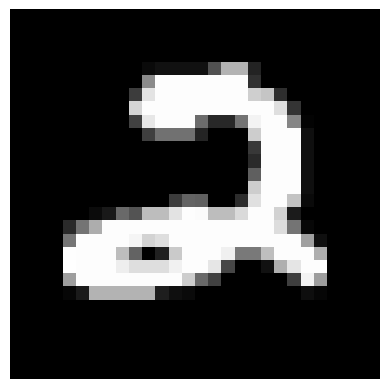


Image #2
Model Prediction: 0


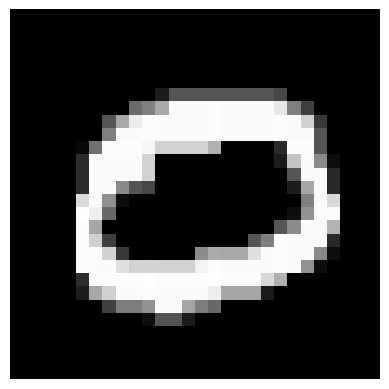


Image #3
Model Prediction: 9


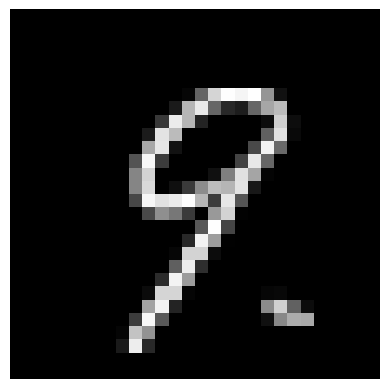


Image #4
Model Prediction: 7


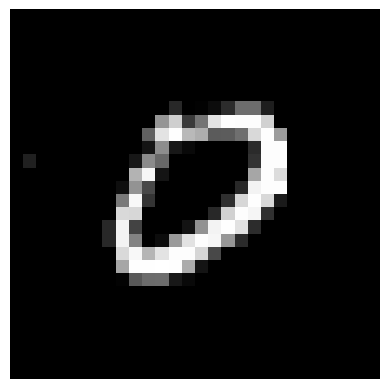


Image #5
Model Prediction: 3


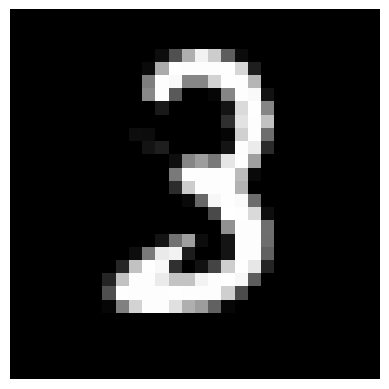


Image #6
Model Prediction: 7


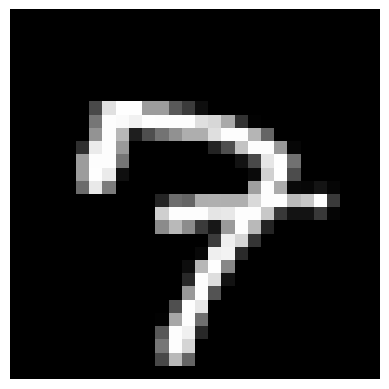


Image #7
Model Prediction: 0


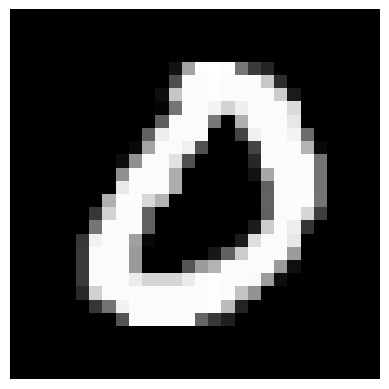


Image #8
Model Prediction: 3


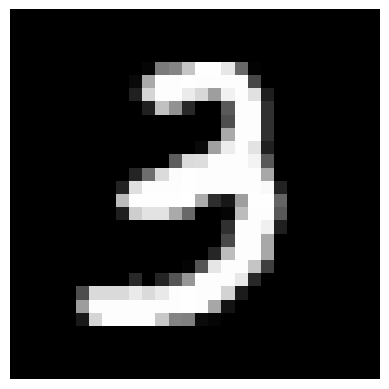


Image #9
Model Prediction: 0


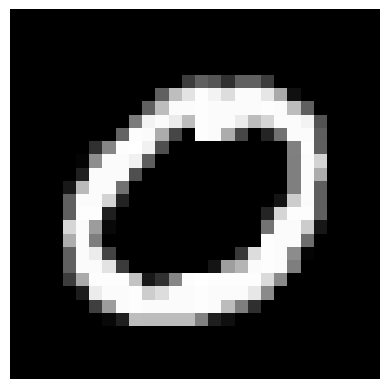


Image #10
Model Prediction: 3


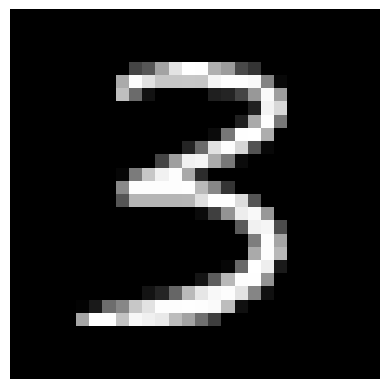

In [41]:
test_data = pd.read_csv("./data/test.csv")
test_data_np = np.array(test_data)

X_test_np = test_data_np.T
X_test_np = X_test_np / 255. # Normalize

X_test_gpu = cp.asarray(X_test_np)

test_predictions = make_prediction(X_test_gpu,W1,b1,W2,b2,W3,b3)

for i in range(10):
    current_img_gpu = X_test_gpu[:, i]
    network_input = current_img_gpu.reshape(784, 1)
    prediction = make_prediction(network_input, W1, b1, W2, b2, W3, b3)
    image_to_plot_gpu = current_img_gpu.reshape((28, 28)) * 255

    image_to_plot_cpu = image_to_plot_gpu.get()

    print(f"\nImage #{i+1}")
    print(f"Model Prediction: {prediction.item()}")

    plt.imshow(image_to_plot_cpu, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.show()